## Metoda Newtona i Quasi-Newtona (zmiennej metryki)

Możesz kojarzyć metodę Newtona z przedmiotu metody numeryczne, jako metodę iteracyjnego znajdowania rozwiązań pierwiastków funkcji nieliniowych. Konkretnie to przedstawiała się następująco:
Mamy różniczkowalną funkcję $f:\mathbb{R}\rightarrow\mathbb{R}$ i punkt początkowy $x_0$. I poprzez kolejne iteracje $x_n=x_{n-1}-\frac{f(x_{n-1})}{f'(x_{n-1})}$ znajdujemy kolejne przybliżenie miejsca zerowego.

W przypadku wielowymiarowym mamy $f:\mathbb{R^m}\rightarrow\mathbb{R^m}$ oraz iteracje $x_n=x_{n-1}-{\nabla f(x_{n-1})}^{-1}f(x_{n-1})$.

Załóżmy, że chcemy zminimalizować funkcję $g:\mathbb{R^m}\rightarrow\mathbb{R}$. Wiemy, że warunkiem koniecznym optymalności jest aby $\nabla g(x)=0$. Poszukajmy zatem miejsca zerowego $\nabla g:\mathbb{R^m}\rightarrow\mathbb{R^m}$ wykorzystując metodę Newtona:
1. Wybierz $eps > 0$ oraz $x_0\in \mathbb{R^m}$, n=0
2. Wyznacz $x_{n+1}=x_{n}-{H g(x_{n})}^{-1}\nabla g(x_{n})$
3. n += 1
4. Jeżeli $||x_{n}-x_{n-1}||>eps$, to wróć do 2.
5. Zwróć $x_n$.

gdzie $Hg$ to macierz Hessego funkcji g.

### Zadanie 1 (2 pkt)
Zaimplementuj metodę Newtona minimalizacji funkcji $f(x,y)=\frac{1}{2}(10x^2+y^2)+5*\log(1+e^{-x-y})$ i porównaj ją z metodą gradientu prostego. Sporządź wykres błędu obu metod od ilości iteracji oraz wykres, na którym zaznaczysz kolejne położenia przybliżeń metody. Możesz wykorzystać metody grad i hessian z pakietu autograd.

Wskazówka: dla przykładowego wykresu zastosowano krok metody gradientu prostego $\alpha=0.09$

In [99]:
from autograd import grad, hessian
from autograd import numpy as np
import matplotlib.pyplot as plt

In [225]:
## PISZ TUTAJ

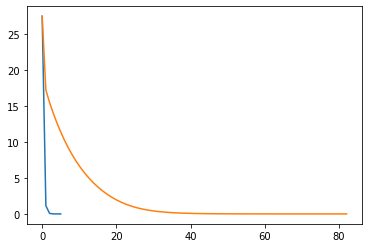

In [208]:
## PISZ TUTAJ

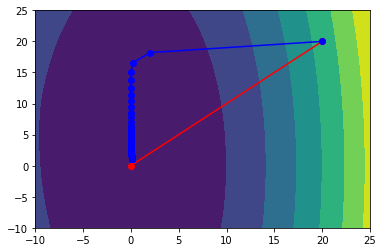

In [209]:
x = np.linspace(-10,25,100)
y = np.linspace(-10,25,100)
xx,yy = np.meshgrid(x,y)
z = function(np.array([xx,yy]))
plt.contourf(xx,yy,z)
plt.plot(history1[:,0],history1[:,1], '-o', c='r')
plt.plot(history2[:,0],history2[:,1], '-o', c='b')

Dla punktów początkowych położonych blisko ekstremum metoda Newtona charakteryzuje się szybką zbieżnością - kwadratową. W wypadku uogólnionej metody Newtona wyznaczamy kolejne przybliżenia ekstremum następująco:
1. $x_{n+1}=x_n+\alpha d_n$, gdzie $\alpha=\text{arg}\min_\alpha(g(x_n+\alpha d_n))$, gdzie
2. $d_n = -V_n\nabla g(x_n)$, gdzie
3. $V_n = (H g(x_n))^{-1}$

Szczególnie dla funkcji wielu zmiennych obliczanie macierzy Hessego i jej odwracanie może być kosztowne obliczeniowo. Dlatego, zamiast go wyliczać, można wyznaczać jego przybliżenia w kolejnych krokach za pomocą wzorów korekcyjnych otrzymując tzw. metodę zmiennej metryki, znaną też jako metoda quasi-Newtona.

Algorytm przedstawia się następująco:
1. Wybierz punkt początkowy $x_0$ oraz przybliżenie odwrotności macierzy Hessego $V_0$ (najczęściej wystarczy macierz jednostkowa $I$).
2. $d_n = -V_n\nabla g(x_n)$
3. Znajdź $\alpha_n \geq 0$ takie, że $\alpha_n=\text{arg}\min_\alpha(g(x_n+\alpha d_n))$
4. $\delta_n=\alpha_n d_n$
5. $x_{n+1}=x_n+\delta$
6. Jeżeli $||\nabla g(x_{n+1})|| < eps$, to zwróć $x_{n+1}$
7. $\gamma_n=\nabla g(x_{n+1})-\nabla g(x_n)$
8. $V_{n+1}=$ jeden z wzorów korekcyjnych
9. n += 1

Jednym ze wzorów korekcyjnych jest wzór Broydena–Fletchera–Goldfarba–Shanno (BFGS):

$$V_{n+1} = \left(I - \frac{\delta_n \gamma_n^{\mathrm T}}{\delta_k^{\mathrm T} \gamma_n}\right) V_n \left(I - \frac{\gamma_n \delta_n^{\mathrm T}}{\delta_n^{\mathrm T} \gamma_n}\right) + \frac{\delta_n \delta_n^{\mathrm T}}{\delta_k^{\mathrm T} \, \gamma_n}$$

Wśród wzorów korekcyjnych można wymienić także wzór Davidona-Fletchera-Powella, czy Wolfe'a-Broydena-Davidona.

### Zad 2 (2 pkt)
Zaimplementuj metodę zmiennej metryki wraz ze wzorem korekcyjnym BFGS i przetestuj ją na funkcji z poprzedniego zadania. Dla porównania wykorzystaj też metodę `minimize` z pakietu `scipy.optimize`, która domyślnie korzysta z metody BFGS.

Co się stanie, gdy podamy oraz gdy nie podamy argumentu "jac"?

In [223]:
from scipy import optimize

Optimization terminated successfully.
         Current function value: 1.969726
         Iterations: 9
         Function evaluations: 44
         Gradient evaluations: 11


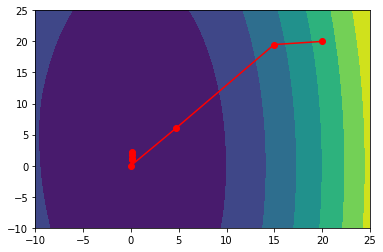

In [235]:
## PISZ TUTAJ
x = np.linspace(-10,25,100)
y = np.linspace(-10,25,100)
xx,yy = np.meshgrid(x,y)
z = ???
plt.contourf(xx,yy,z)
plt.plot(history[:,0],history[:,1], '-o', c='r')

### Zad 3 (2 pkt)

Rozwiąż następujący problem (wykorzystując wybrany przez siebie algorytm optymalizacji):
a) Mamy do podziału 100zł pomiędzy 2 osoby. Pierwsza z osób jest biedna i ma tylko 10zł. Druga osoba jest nieco bogatsza i posiada 2000zł. Zakładamy, że użyteczność pieniędzy jest wprost proporcjonalna do logarytmu z ich ilości. Traktując problem podziału jako problem przetargu, rozwiązaniem problemu spełniający aksjomaty Nasha będzie funkcja maksymalizująca iloczyn przyrostu użyteczności obu osób.

b) Mamy do podziału 100zł pomiędzy 3 osoby. Pierwsza z osób jest biedna i ma tylko 10zł. Druga osoba jest nieco bogatsza i posiada 2000zł, a trzecia posiada niezliczone ilości pieniędzy. Dalej zakładamy, że użyteczność pieniędzy będzie proporcjonalna do logarytmu z ich ilości, przy czym dla trzeciej osoby zależność wzrostu użyteczności od przyrostu pieniędzy jest w przybliżeniu liniowa. Jaki będzie podział kwoty maksymalizujący iloczyn przyrostu użyteczności wzystkich 3 osób?


In [221]:
## PISZ TUTAJ

34.53596896141865 65.46403103858135


In [232]:
## PISZ TUTAJ

22.73388416928667 38.44943598092909 38.81667984978424


Uwaga! Przy wyborze niektórych punktów startowych możemy utknąć w ekstremum, które nie ma sensu (np. ktoś ma otrzymać ujemną gotówkę). Jak temu zaradzić? O optymalizacji z ograniczeniami będzie w przyszłości na ćwiczeniach :)